# **EDA Curah Hujan Aceh tahun 2017-2019**

##### <span style="color:green;"> Curah hujan dianalisis terlebih dahulu melalui data historis dari BPS Aceh tahun 2017-2019, untuk menggambarkan bagaimana pola hujan di setiap daerah Aceh. Analisis curah hujan dilakukan karena hujan merupakan salah satu pemicu adanya banjir. Tanpa hujan, maka tentu tidak akan ada kebanjiran. Dalam EDA ini, saya akan mencoba melihat bagaimana pola hujan di Aceh, menganalisis kapan periode hujan yang ekstrem, melihat apakah ada indikasi tertentu saat musim banjir, dan variabel apa yang bisa digunakan sebagai fitur di Machine Learning nanti </span>

## Import Library

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [31]:
rain_df = pd.read_csv("Data Curah Hujan Aceh/CurahHujan_2017sd2019.csv")
rain_df.head()

,provinsi,tahun,bulan,indikator,nilai,satuan,sumber
0,Aceh,2017,Januari,Curah Hujan,337.9,mm,BPS
1,Aceh,2017,Februari,Curah Hujan,108.7,mm,BPS
2,Aceh,2017,Maret,Curah Hujan,327.5,mm,BPS
3,Aceh,2017,April,Curah Hujan,50.6,mm,BPS
4,Aceh,2017,Mei,Curah Hujan,167.0,mm,BPS


## Cek Struktur Data

In [32]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   provinsi   36 non-null     object 
 1   tahun      36 non-null     int64  
 2   bulan      36 non-null     object 
 3   indikator  36 non-null     object 
 4   nilai      36 non-null     float64
 5   satuan     36 non-null     object 
 6   sumber     36 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.1+ KB


In [33]:
rain_df.columns

Index(['provinsi', 'tahun', 'bulan', 'indikator', 'nilai', 'satuan', 'sumber'], dtype='object')

## Cek Missing Value

In [34]:
rain_df.isnull().sum()

provinsi     0
tahun        0
bulan        0
indikator    0
nilai        0
satuan       0
sumber       0
dtype: int64

##### <span style="color:red;">Tidak ada Missing Value disini, jadi kita tidak perlu melakukan dropna</span>

## Cek Isi Indikator

In [35]:
rain_df["indikator"].value_counts()

indikator
Curah Hujan    36
Name: count, dtype: int64

##### <span style="color:red;">Indikator sudah sama semua, jadi tidak perlu disamakan apapun</span>

## Statistik Deskriptif

In [36]:
rain_df["nilai"].describe()

count     36.000000
mean     196.650833
std      146.877097
min       20.300000
25%       82.900000
50%      151.400000
75%      272.650000
max      578.400000
Name: nilai, dtype: float64

## Distribusi Curah Hujan

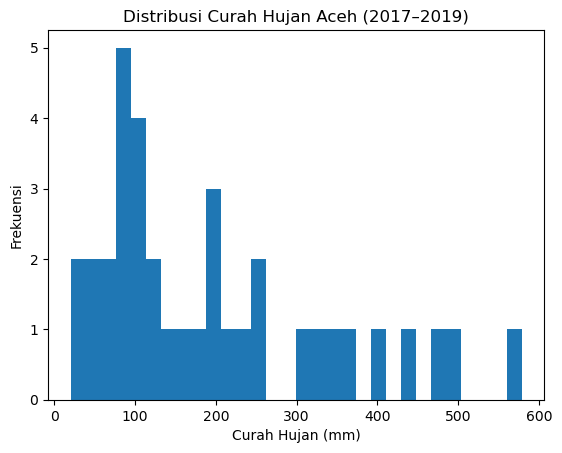

In [37]:
plt.figure()
plt.hist(rain_df["nilai"], bins=30)
plt.xlabel("Curah Hujan (mm)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Curah Hujan Aceh (2017–2019)")
plt.show()

## Rata-rata hujan per bulan

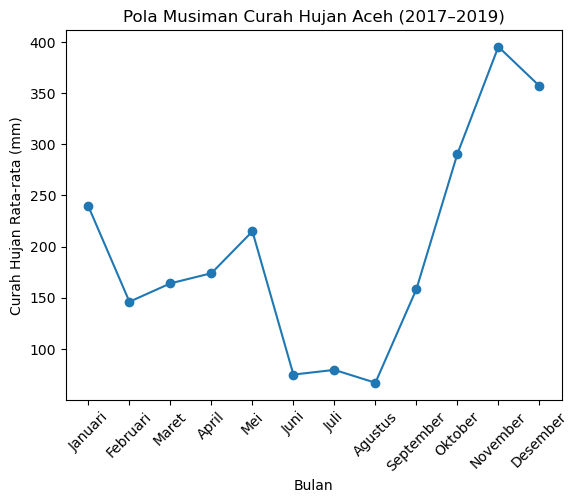

In [38]:
bulan_map = {
    "Januari": 1,
    "Februari": 2,
    "Maret": 3,
    "April": 4,
    "Mei": 5,
    "Juni": 6,
    "Juli": 7,
    "Agustus": 8,
    "September": 9,
    "Oktober": 10,
    "November": 11,
    "Desember": 12
}

rain_df["bulan_angka"] = rain_df["bulan"].map(bulan_map)
monthly_avg = (
    rain_df
    .groupby("bulan_angka")["nilai"]
    .mean()
    .sort_index()
)

plt.figure()
plt.plot(
    monthly_avg.index,
    monthly_avg.values,
    marker="o"
)

plt.xticks(
    ticks=range(1, 13),
    labels=list(bulan_map.keys()),
    rotation=45
)

plt.xlabel("Bulan")
plt.ylabel("Curah Hujan Rata-rata (mm)")
plt.title("Pola Musiman Curah Hujan Aceh (2017–2019)")
plt.show()


## Analisis Tren Tahunan (Annualy)

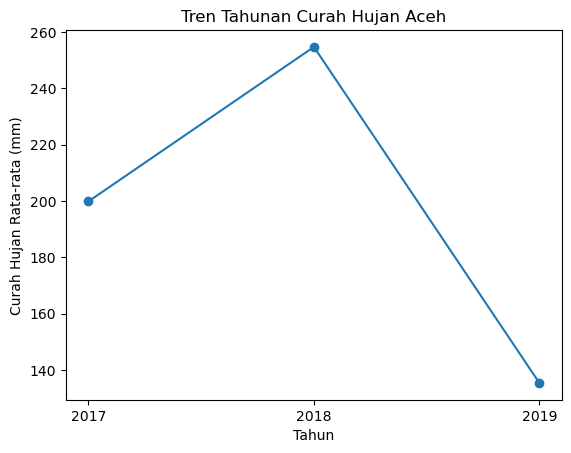

In [39]:
yearly_avg = rain_df.groupby("tahun")["nilai"].mean()

plt.figure()
plt.plot(yearly_avg.index, yearly_avg.values, marker="o")

plt.xticks(
    ticks=yearly_avg.index,
    labels=yearly_avg.index
)

plt.xlabel("Tahun")
plt.ylabel("Curah Hujan Rata-rata (mm)")
plt.title("Tren Tahunan Curah Hujan Aceh")
plt.show()



## Identifikasi curah hujan ekstreme sebagai Feature ML

In [40]:
threshold = rain_df["nilai"].quantile(0.90)

rain_df["hujan_ekstrem"] = rain_df["nilai"] > threshold

rain_df["hujan_ekstrem"].value_counts()


hujan_ekstrem
False    32
True      4
Name: count, dtype: int64

In [41]:
rain_df[rain_df["hujan_ekstrem"] == True][
    ["tahun", "bulan", "nilai"]
].sort_values(["tahun"])

,tahun,bulan,nilai
10,2017,November,429.6
11,2017,Desember,473.7
22,2018,November,578.4
23,2018,Desember,498.8


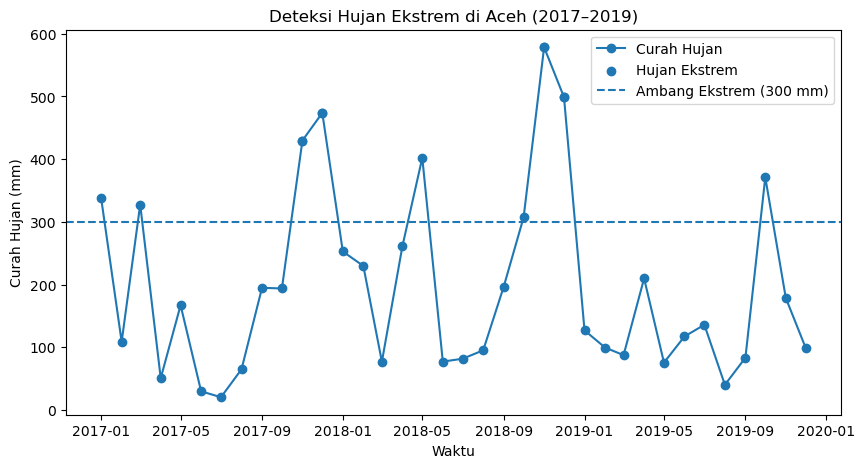

In [42]:
bulan_map = {
    "Januari": 1,
    "Februari": 2,
    "Maret": 3,
    "April": 4,
    "Mei": 5,
    "Juni": 6,
    "Juli": 7,
    "Agustus": 8,
    "September": 9,
    "Oktober": 10,
    "November": 11,
    "Desember": 12
}

rain_df["bulan_num"] = rain_df["bulan"].map(bulan_map)

rain_df["tanggal"] = pd.to_datetime(
    rain_df["tahun"].astype(str) + "-" +
    rain_df["bulan_num"].astype(str) + "-01"
)

rain_df = rain_df.sort_values("tanggal")

plt.figure(figsize=(10,5))

plt.plot(
    rain_df["tanggal"],
    rain_df["nilai"],
    marker="o",
    label="Curah Hujan"
)

plt.scatter(
    rain_df[rain_df["hujan_ekstrem"]]["tanggal"],
    rain_df[rain_df["hujan_ekstrem"]]["nilai"],
    label="Hujan Ekstrem"
)

plt.axhline(300, linestyle="--", label="Ambang Ekstrem (300 mm)")

plt.xlabel("Waktu")
plt.ylabel("Curah Hujan (mm)")
plt.title("Deteksi Hujan Ekstrem di Aceh (2017–2019)")
plt.legend()
plt.show()
